# 🎵 Exploratory Data Analysis (EDA) - Spotify Dataset 🎧
### 📌 Objective
* The goal of this EDA is to analyze and understand the relationships between different song attributes, streaming metrics, and other numerical features.

# 📂 Dataset Overview
    The dataset contains multiple numerical and categorical features related to Spotify songs.
    We focus on correlation analysis to identify dependencies between key features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv("mxmh_survey_cleaned.csv") 
df.head()


,timestamp,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,...,frequency_rb,frequency_rap,frequency_rock,frequency_video_game_music,anxiety,depression,insomnia,ocd,music_effects,permissions
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve,I understand.
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve,I understand.
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
# Check summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   736 non-null    object 
 1   age                         736 non-null    float64
 2   primary_streaming_service   736 non-null    object 
 3   hours_per_day               736 non-null    float64
 4   while_working               736 non-null    object 
 5   instrumentalist             736 non-null    object 
 6   composer                    736 non-null    object 
 7   fav_genre                   736 non-null    object 
 8   exploratory                 736 non-null    object 
 9   foreign_languages           736 non-null    object 
 10  bpm                         736 non-null    float64
 11  frequency_classical         736 non-null    object 
 12  frequency_country           736 non-null    object 
 13  frequency_edm               736 non

In [4]:
# Quick stats for numeric columns
df.describe()

,age,hours_per_day,bpm,anxiety,depression,insomnia,ocd
count,736.000000,736.000000,7.360000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.201087,3.572758,1.358818e+06,5.837636,4.796196,3.738451,2.637228
std,12.047764,3.028199,3.686048e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.050000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.400000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


# 📊 Distribution of Age

C:\Users\dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128118 (\N{BABY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129491 (\N{OLDER ADULT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


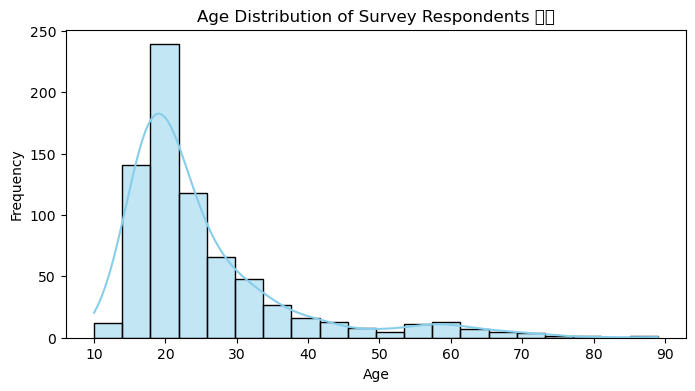

In [6]:
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Survey Respondents 👶🧓")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


# 🎶 Favorite Music Genre 

C:\Users\dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


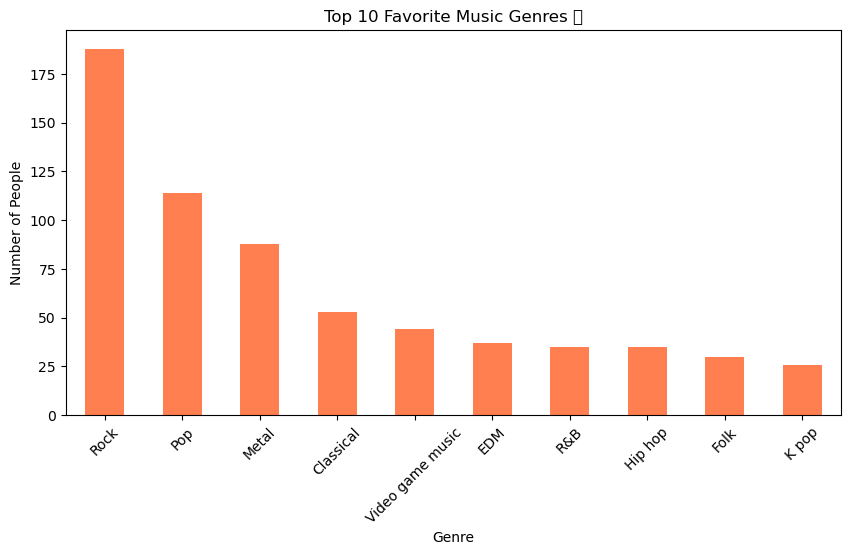

In [8]:
plt.figure(figsize=(10, 5))
df['fav_genre'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Top 10 Favorite Music Genres 🎼")
plt.xlabel("Genre")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.show()


# ⏱️ Hours of Music per Day 

C:\Users\dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


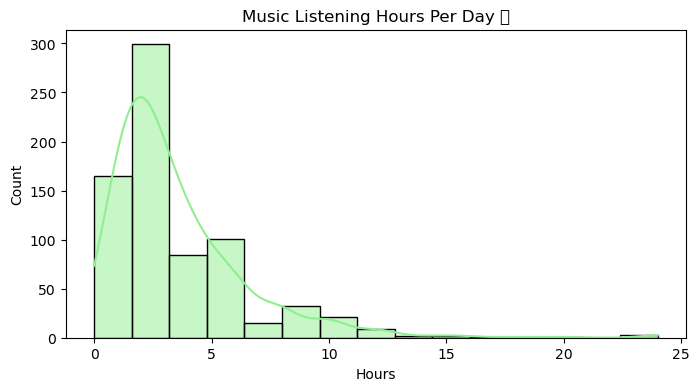

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(df['hours_per_day'], bins=15, kde=True, color='lightgreen')
plt.title("Music Listening Hours Per Day ⏱️")
plt.xlabel("Hours")
plt.ylabel("Count")
plt.show()


# 🧠 Mental Health Condition Distribution

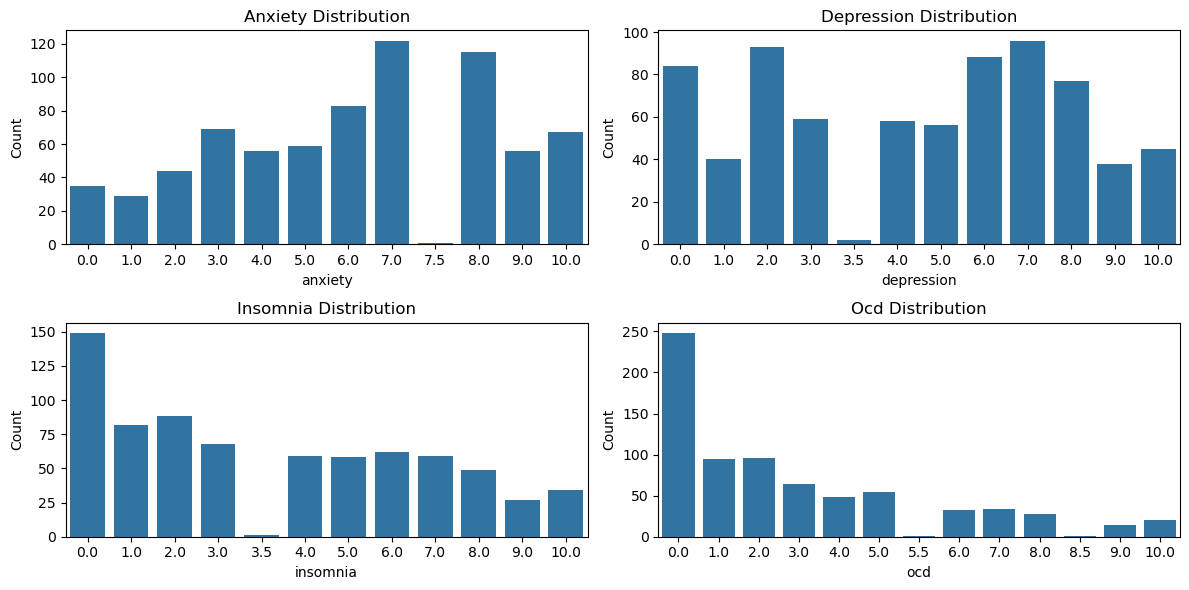

In [12]:
mental_cols = ['anxiety', 'depression', 'insomnia', 'ocd']
plt.figure(figsize=(12, 6))

for i, col in enumerate(mental_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f"{col.capitalize()} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


# 🔗 Correlation Heatmap (Survey Metrics)

C:\Users\dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


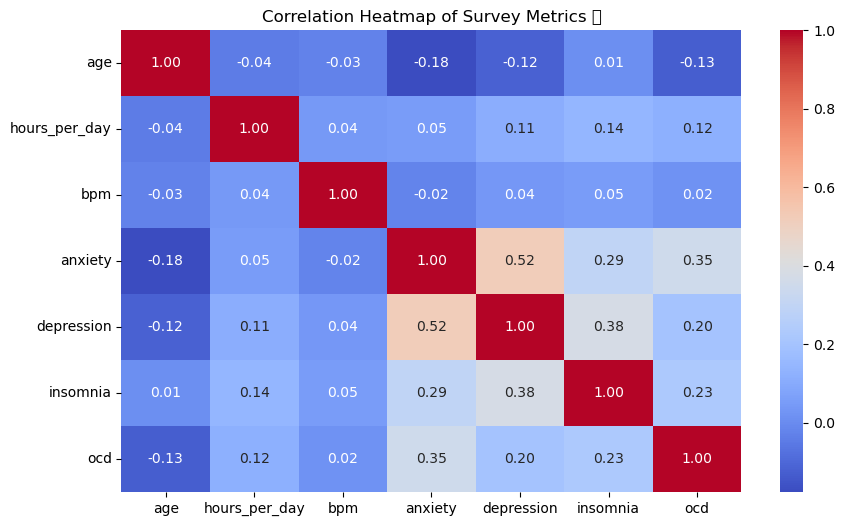

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Survey Metrics 💥")
plt.show()
